In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from feature_selection import feature_selection
plt.style.use('fivethirtyeight')
%matplotlib inline

# Lab1

In [2]:
df_hitters = pd.read_csv('Data/Hitters.csv')
df_hitters = df_hitters.iloc[:,1:]
display(df_hitters.shape)
display(df_hitters.head())
df_hitters_to_work = df_hitters.copy()


(322, 20)

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

## Data Manipulation

In [3]:
df_hitters_to_work = df_hitters.copy()
df_hitters_to_work.dropna(inplace= True)
display(df_hitters_to_work.info())

y = df_hitters_to_work.Salary

df_hitters_to_work.drop(['Salary'],axis = 1, inplace= True) 
numeric_features = list(df_hitters_to_work.dtypes[df_hitters_to_work.dtypes != 'object'].index)
#scaler = StandardScaler()
#df_hitters_to_work.loc[:,numeric_features] = scaler.fit_transform(df_hitters_to_work.loc[:,numeric_features])
X= pd.get_dummies(df_hitters_to_work)
X.drop(['League_A','Division_E','NewLeague_A'],axis=1,inplace= True)
features = list(X.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

None

<AxesSubplot:>

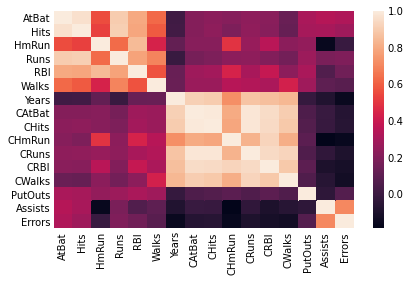

In [4]:
sns.heatmap(X.loc[:,numeric_features].corr())

In [5]:
feature_select = feature_selection(X,y)
result_dict_best_subset = feature_select.best_subset_selection(num_features=3)
result_dict_best_subset = feature_select.select_best_model()

Done for 0 features


In [6]:
df_results = pd.DataFrame(result_dict_best_subset).T
df_results

feature              mse        r2          aic          bic  \
0                     ()    202734.269158         0            0            0   
1                (CRBI,)  17139433.533604   0.32145  3862.139307  3869.283615   
2           (Hits, CRBI)  11336276.449136  0.425224  3820.487305  3831.203767   
3  (Hits, CRBI, PutOuts)   8023271.977593  0.451429   3810.21444  3824.503056   

  adjusted_r2                                             params  
0           0                                                NaN  
1     0.31885  const    274.580386
CRBI       0.790954
dtype:...  
2    0.420802  const   -47.955902
Hits      3.300845
CRBI    ...  
3    0.445075  const     -71.459220
Hits        2.803816
CRBI...

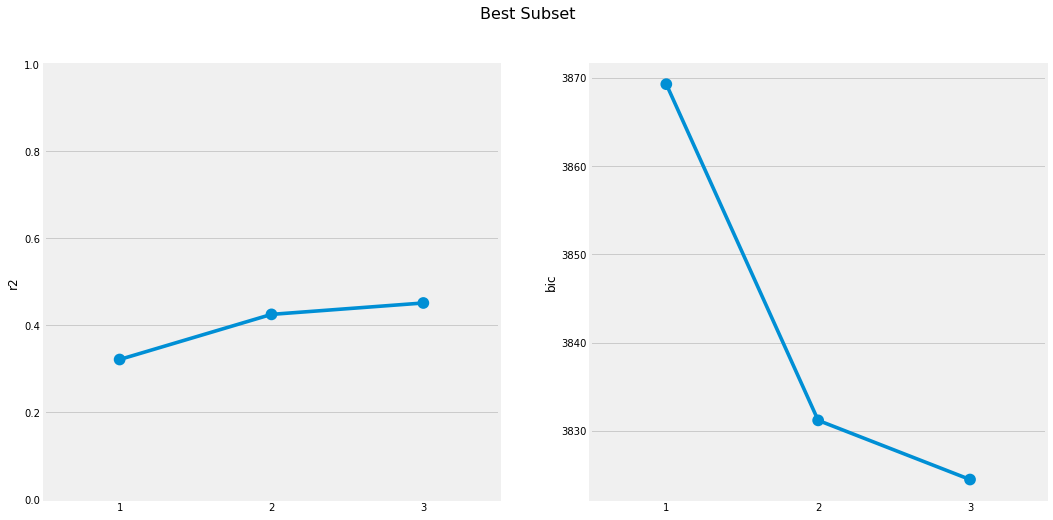

In [7]:
fig,axs = plt.subplots(1,2,figsize = (16,8))
fig.suptitle('Best Subset', fontsize=16)
sns.pointplot(x= df_results.index[1:].values, y=df_results.r2[1:],ax= axs[0],scale = 0.5)
axs[0].set_ylim([0,1])
sns.pointplot(x= df_results.index[1:].values, y=df_results.bic[1:],ax= axs[1],scale = 0.5)

plt.show()

In [8]:
feature_select = feature_selection(X,y)
result_dict = feature_select.forward_stepwise_selection(num_features=8)
result_dict = feature_select.select_best_model('forward_stepwise')
df_results = pd.DataFrame(result_dict).T
df_results

feature              mse  \
0                                                 ()    202734.269158   
1                                            (CRBI,)  17139433.533604   
2                                       (CRBI, Hits)  11336276.449136   
3                              (CRBI, Hits, PutOuts)   8023271.977593   
4                  (CRBI, Hits, PutOuts, Division_W)   6337065.243207   
5           (CRBI, Hits, PutOuts, Division_W, AtBat)   5233842.671327   
6    (CRBI, Hits, PutOuts, Division_W, AtBat, Walks)   4520701.476842   
7  (CRBI, Hits, PutOuts, Division_W, AtBat, Walks...   3909270.815276   
8  (CRBI, Hits, PutOuts, Division_W, AtBat, Walks...   3519984.867321   

         r2          aic          bic adjusted_r2  \
0         0            0            0           0   
1   0.32145  3862.139307  3869.283615     0.31885   
2  0.425224  3820.487305  3831.203767    0.420802   
3  0.451429   3810.21444  3824.503056    0.445075   
4  0.475407  3800.460294  3818.321064    0.467273   
5  0.490804  3794.625624  3816.058548    0.480897   
6  0.508715     3787.208  3812.213078      0.4972   
7  0.513229  3786.780304  3815.357536    0.499866   
8  0.528139  3780.598605  3812.747991    0.513277   

                                              params  
0                                                NaN  
1  const    274.580386
CRBI       0.790954
dtype:...  
2  const   -47.955902
CRBI      0.689899
Hits    ...  
3  const     -71.459220
CRBI        0.682528
Hits...  
4  const          13.923104
CRBI            0.681...  
5  const          97.768412
CRBI            0.688...  
6  const          91.511798
CRBI            0.643...  
7  const         109.787306
CRBI            0.853...  
8  const         117.152043
CRBI            0.527...

In [9]:
df_results.params[7]

const         109.787306
CRBI            0.853762
Hits            7.449877
PutOuts         0.253340
Division_W   -127.122393
AtBat          -1.958885
Walks           4.913140
CWalks         -0.305307
dtype: float64

In [13]:
feature_select = feature_selection(X,y)
result_dict = feature_select.backward_stepwise_selection(num_features=7)
result_dict = feature_select.select_best_model('backward_stepwise')
df_results = pd.DataFrame(result_dict).T
df_results

['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W']
['AtBat', 'Hits', 'HmRun', 'Runs', 'Walks', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W']
['AtBat', 'Hits', 'HmRun', 'Runs', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W']
['AtBat', 'Hits', 'R

feature             mse  \
19  (AtBat, Hits, HmRun, Runs, RBI, Walks, Years, ...  1532548.065104   
18  (AtBat, Hits, HmRun, Runs, RBI, Walks, Years, ...  1617626.412778   
17  (AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...     1712333.296   
16  (AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...  1818733.457232   
15  (AtBat, Hits, HmRun, Runs, Walks, CAtBat, CHit...  1938929.028895   
14  (AtBat, Hits, HmRun, Runs, Walks, CAtBat, CRun...  2076460.885418   
13  (AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...  2233074.226954   
12  (AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...  2415490.034114   
11  (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...  2630160.703382   
10  (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...  2881871.125091   
9   (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...  3167229.044673   
8   (AtBat, Hits, Walks, CRuns, CRBI, CWalks, PutO...  3519984.867321   
7   (AtBat, Hits, Walks, CRuns, CWalks, PutOuts, D...  3912232.191737   

          r2          aic          bic adjusted_r2  \
19  0.546116   3792.38278   3863.82586    0.510627   
18  0.546095  3790.395144  3858.266071     0.51261   
17  0.545952  3788.477822  3852.776595    0.514446   
16  0.545766  3786.585683  3847.312301    0.516222   
15  0.545469  3784.757199  3841.911664    0.517866   
14  0.545216  3782.903476  3836.485787    0.519543   
13  0.544457  3781.342235  3831.352392    0.520674   
12   0.54363  3779.819145  3826.257147    0.521724   
11  0.542615  3778.403359  3821.269208    0.522571   
10  0.540495  3777.619775  3816.913469    0.522261   
9   0.534612  3778.965286  3814.686826    0.518057   
8   0.528139  3780.598605  3812.747991    0.513277   
7   0.513617  3786.570162  3815.147394    0.500266   

                                               params  
19  const          163.103588
AtBat           -1.9...  
18  const          163.083796
AtBat           -1.9...  
17  const          148.433332
AtBat           -1.9...  
16  const         148.583625
AtBat          -1.970...  
15  const         147.974594
AtBat          -1.999...  
14  const         144.679318
AtBat          -2.088...  
13  const         142.909013
AtBat          -2.012...  
12  const         135.519492
AtBat          -2.056...  
11  const         135.751219
AtBat          -2.127...  
10  const         162.535442
AtBat          -2.168...  
9   const         146.249600
AtBat          -1.936...  
8   const         117.152043
AtBat          -2.033...  
7   const         105.648749
AtBat          -1.976...

In [14]:
df_results.params[7]

const         105.648749
AtBat          -1.976284
Hits            6.757491
Walks           6.055869
CRuns           1.129309
CWalks         -0.716335
PutOuts         0.302885
Division_W   -116.169217
dtype: float64